# **TRANSJAKARTA ANALYSIS**
***


# **DATA BACKGROUND**



*Dataset Source*: https://drive.google.com/drive/folders/1S04hk5uHfHYe6J1S6fVqDunuja1Lk1Lo?usp=sharing

TransJakarta are the first Bus Rapid Transit (BRT) in Southeast Asian and started to operate since 01 Februari 2004. After 20 years operating, TransJakarta consist of 252 stops distributed across 14 main corridors. TransJakarta are divided into three types of fleets: Regulars TransJakarta, RoyalTrans, and JakLingko.

TransJakarta, which continuously evolves, is also accompanied by the growth of its user base over time. The increasing number of fleets, services, and facilities reflects TransJakarta's concern for public transportation users. As an effort to provide the best services and facilities to its users, an analysis is needed to understand the behavior of transportation users provided by TransJakarta.


# **PROBLEM AND GOALS**

With the aim of developing TransJakarta transportation sustainably, the main issue to be addressed in this data is to **Analyze the Travel Pattern of Transjakarta Users to Understand the Optimalization of TransJakarta Services in Jabodetabek?**

The purpose of delving into this issue is to identify the travel patterns of TransJakarta users so that TransJakarta can create targeted services and facilities.

# **DATA UNDERSTANDING**


In [221]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import folium
import matplotlib.pyplot as plt
from datetime import datetime

In [222]:
df = pd.read_csv('Transjakarta.csv')
df.head()

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,...,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount
0,EIIW227B8L34VB,180062659848800,emoney,Bajragin Usada,M,2008,5,Matraman Baru - Ancol,1.0,P00142,...,106.84402,7,2023-04-03 05:21:44,P00253,Tegalan,-6.203101,106.85715,12.0,2023-04-03 06:00:53,3500.0
1,LGXO740D2N47GZ,4885331907664776,dki,Gandi Widodo,F,1997,6C,Stasiun Tebet - Karet via Patra Kuningan,0.0,B01963P,...,106.83302,13,2023-04-03 05:42:44,B03307P,Sampoerna Strategic,-6.217152,106.81892,21.0,2023-04-03 06:40:01,3500.0
2,DJWR385V2U57TO,4996225095064169,dki,Emong Wastuti,F,1992,R1A,Pantai Maju - Kota,0.0,B00499P,...,106.81435,38,2023-04-03 05:59:06,B04962P,Simpang Kunir Kemukus,-6.133731,106.81475,39.0,2023-04-03 06:50:55,3500.0
3,JTUZ800U7C86EH,639099174703,flazz,Surya Wacana,F,1978,11D,Pulo Gebang - Pulo Gadung 2 via PIK,0.0,B05587P,...,106.93526,23,2023-04-03 05:44:51,B03090P,Raya Penggilingan,-6.183068,106.93194,29.0,2023-04-03 06:28:16,3500.0
4,VMLO535V7F95NJ,570928206772,flazz,Embuh Mardhiyah,M,1982,12,Tanjung Priok - Pluit,0.0,P00239,...,106.88900,5,2023-04-03 06:17:35,P00098,Kali Besar Barat,-6.135355,106.81143,15.0,2023-04-03 06:57:03,3500.0


In [223]:
df.columns

Index(['transID', 'payCardID', 'payCardBank', 'payCardName', 'payCardSex',
       'payCardBirthDate', 'corridorID', 'corridorName', 'direction',
       'tapInStops', 'tapInStopsName', 'tapInStopsLat', 'tapInStopsLon',
       'stopStartSeq', 'tapInTime', 'tapOutStops', 'tapOutStopsName',
       'tapOutStopsLat', 'tapOutStopsLon', 'stopEndSeq', 'tapOutTime',
       'payAmount'],
      dtype='object')

This dataset contains **22 original columns** with various information, including:

|**No.**|**Column Name**|**Column Description**|
|:-----:|---------------|----------------------|
|1.|`transID`|Unique transaction id for every transaction|
|2.|`payCardID`|Customers main identifier. The card customers use as a ticket for entrance and exit|
|3.|`payCardBank`|Customers card bank issuer name|
|4.|`payCardName`|Customers name that is embedded in the card|
|5.|`payCardSex`|Customers sex that is embedded in the card|
|6.|`payCardBirthDate`|Customer birth year|
|7.|`corridorID`|Corridor ID / Route ID as key for route grouping|
|8.|`corridorName`|Corridor Name / Route Name contains Start and Finish for each route|
|9.|`direction`|0 for Go, 1 for Back. Direction of the route|
|10.|`tapInStops`|Tap In (entrance) Stops ID for identifying stops name|
|11.|`tapInStopsName`|Tap In (entrance) Stops Name where customers tap in|
|12.|`tapInStopsLat`|Latitude of Tap In Stops|
|13.|`tapInStopsLon`|Longitude of Tap In Stops|
|14.|`stopStartSeq`|Sequence of the stops, 1st stop, 2nd stops, etc. Related to direction|
|15.|`tapInTime`|Time of tap in. Date and Time|
|16.|`tapOutStops`|Tap Out (exit) stops ID for identifying stops name|
|17.|`tapOutStopsName`|Tap Out (exit) Stops Name where customers tap out|
|18.|`tapOutStopsLat`|Latitude of Tap Out Stops|
|19.|`tapOutStopsLon`|Longitude of Tap Out Stops|
|20.|`stopEndSeq`|Sequence of the stops, 1st stop, 2nd stops etc. Related to direction|
|21.|`tapOutTime`|Time of tap out. Date and time|
|22.|`payAmount`|The number of what customers pay. Some are free. Some not|

In [224]:
# Show the information and the shape of Data Frame of Transjakarta
print(f'This data frame of Transjakarta have {df.shape[0]} rows and {df.shape[1]} columns')

This data frame of Transjakarta have 37900 rows and 22 columns


In [225]:
#Check on duplicated data
duplicate = df.duplicated().sum()

if duplicate > 0:
    print(f'There are {duplicate} duplicated rows')
else:
    print(f'There are {duplicate} duplicated rows. No duplicate, all rows unique. ')

There are 0 duplicated rows. No duplicate, all rows unique. 


In [226]:
rawData = []

for col in df.columns:
    rawData.append([col, df[col].dtype, df[col].isna().sum(), df[col].nunique(), list(df[col].unique())])

dataDesc = pd.DataFrame(columns=['columnName', 'dataType', 'nullValue', 'nUnique', 'sampleUnique'], data=rawData)
dataDesc

,columnName,dataType,nullValue,nUnique,sampleUnique
0,transID,object,0,37900,"[EIIW227B8L34VB, LGXO740D2N47GZ, DJWR385V2U57T..."
1,payCardID,int64,0,2000,"[180062659848800, 4885331907664776, 4996225095..."
2,payCardBank,object,0,6,"[emoney, dki, flazz, online, brizzi, bni]"
3,payCardName,object,0,1993,"[Bajragin Usada, Gandi Widodo, Emong Wastuti, ..."
4,payCardSex,object,0,2,"[M, F]"
5,payCardBirthDate,int64,0,67,"[2008, 1997, 1992, 1978, 1982, 1993, 1974, 199..."
6,corridorID,object,1257,221,"[5, 6C, R1A, 11D, 12, 1T, JAK.18, nan, B14, 1Q..."
7,corridorName,object,1930,216,"[Matraman Baru - Ancol, Stasiun Tebet - Karet ..."
8,direction,float64,0,2,"[1.0, 0.0]"
9,tapInStops,object,1213,2570,"[P00142, B01963P, B00499P, B05587P, P00239, B0..."


**RAW DATA SUMMARY :**
- This data frame of Transjakarta have **37900 rows** and **22 columns**
- There are **0 duplicated rows**, mean every entries of data are unique.
- There are **10 columns with missing value**, such as: `corridorID`, `corridorName`, `tapInStops`, `tapOutStops`, `tapOutStopsName`, `tapOutStopsLat`, `tapOutStopsLon`, `stopEndSeq`, `tapOutTime`, `payAmount`
- `tapInTime` and `tapOutTime` data types are still object and the data format need to be changed into datetime.
- To support the analysis, several new columns need to be added  to the data frame.

# **DATA CLEANING**

## **Change Data Type**

In [227]:
# Change data type 'tapInTime' column from object to date
df['tapInTime'] = pd.to_datetime(df['tapInTime'])

In [228]:
# Change data type 'tapOutTime' column from object to date
df['tapOutTime'] = pd.to_datetime(df['tapOutTime'])

In [229]:
#Checking the current data type 
df[['tapInTime', 'tapOutTime']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37900 entries, 0 to 37899
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   tapInTime   37900 non-null  datetime64[ns]
 1   tapOutTime  36556 non-null  datetime64[ns]
dtypes: datetime64[ns](2)
memory usage: 592.3 KB


In [230]:
# Date range of the dataset
firstDate = df['tapInTime'].min()
lastDate = df['tapOutTime'].max()

print(f'This dataset start date from {firstDate} and last date are {lastDate}')

This dataset start date from 2023-04-01 06:22:27 and last date are 2023-04-30 23:23:18


`tapInTime`and `tapOutTime` column data type has changed from object to datetime.

This dataset range date in April 2023.

## **Missing Value**

In [231]:
# Check any missing value in every column
missingValue = df.isna().sum().reset_index()
missingValue.rename(columns={'index':'columnName', 0:'totalMissingValue'}, inplace=True)
missingValue['percentage%'] = (missingValue['totalMissingValue']/len(df)*100).round(2)

missingValue[missingValue['percentage%']>0]

,columnName,totalMissingValue,percentage%
6,corridorID,1257,3.32
7,corridorName,1930,5.09
9,tapInStops,1213,3.20
15,tapOutStops,2289,6.04
16,tapOutStopsName,1344,3.55
17,tapOutStopsLat,1344,3.55
18,tapOutStopsLon,1344,3.55
19,stopEndSeq,1344,3.55
20,tapOutTime,1344,3.55
21,payAmount,1007,2.66


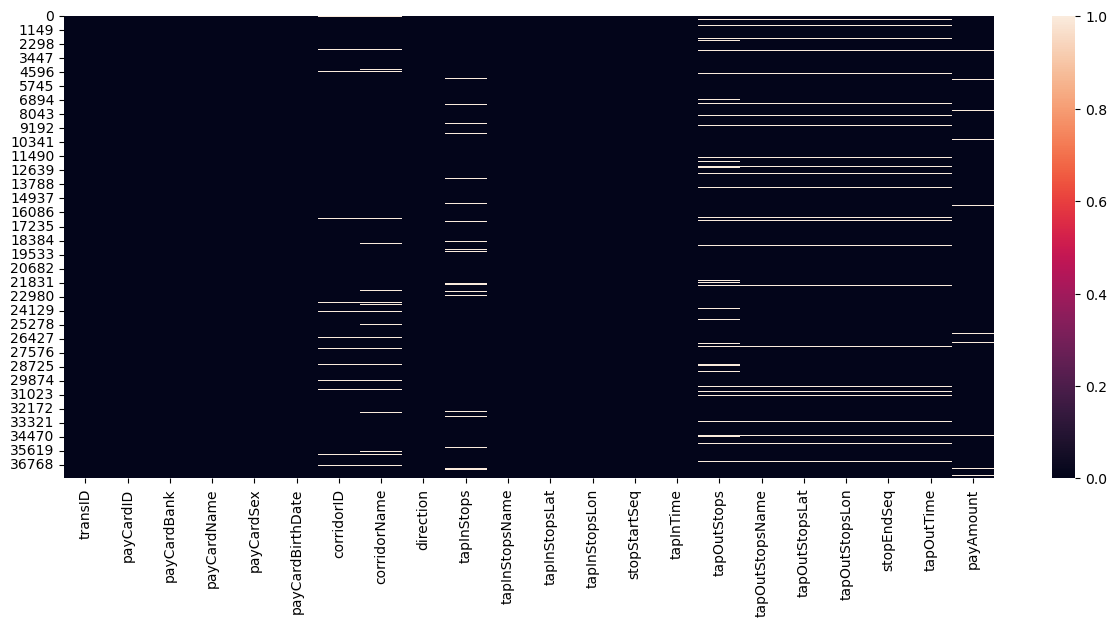

In [232]:
plt.figure(figsize=(15,6))
sns.heatmap(data=df.isna(), vmin=0, vmax=1)
plt.show()

### **Missing Value Treatment on `corridorID` Column**

In [233]:
 # Fill Missing Value on 'corridorID' based on 'corridorName'

mappingCorridorID = df[['corridorID', 'corridorName']].drop_duplicates().dropna()
mappingCorridorID = mappingCorridorID.set_index('corridorName')['corridorID'].to_dict()

df['corridorID'] = df['corridorID'].fillna((df['corridorName']).map(mappingCorridorID))

In [234]:
# Checking missing value after first treatment
df['corridorID'].isna().sum()

1125

Setelah dilakukan pengisian data pada kolom `corridorID` berdasarkan data dari `corridorName`, missing value kolom `corridorID` yang semula sebanyak 1257 menjadi 1125 dimana 132 data dapat di isi. 

Sisa missing value dapat dilakukan treatment pengisian menggunakan informasi dari kolom `tapInStopsLat` dan `tapInStopLon`

In [235]:
# Fill Missing Value on 'corridorID' based on 'tapInStopsLat' and 'tapInStopsLon'

mappingCorridorID_1 = df.dropna(subset='corridorID').drop_duplicates(['tapInStopsLat', 'tapInStopsLon'])
mappingCorridorID_1 = mappingCorridorID_1.set_index(['tapInStopsLat', 'tapInStopsLon'])['corridorID']
mappingCorridorID_1


# Function to Fill corridorID by tapInStopsLat and tapInStopsLon:
def fillna_corridorID_1 (row):
    if pd.isnull(row['corridorID']) and pd.notnull(row['tapInStopsLat']) and pd.notnull(row['tapInStopsLon']):
        return mappingCorridorID_1.get((row['tapInStopsLat'], row['tapInStopsLon']))
    return row['corridorID']

# Applying the function
df['corridorID'] = df.apply(fillna_corridorID_1, axis=1)

In [236]:
# Checking missing value after second treatment
df['corridorID'].isna().sum()

33

Setelah melakukan pengisian missing values pada kolom `corridorID` berdasarkan data dari kolom `tapInStopsLat` dan `tapInStopsLon`, kolom `corridorID` yang sebelumnya memiliki missing value sebanyak 1125 menjadi hanya 33 kolom.

### **Missing Value Treatment on `corridorName` Column**

In [237]:
# Fill Missing Value on 'corridorName' based on 'corridorID'
mappingCorridorName = df.dropna(subset='corridorName').drop_duplicates('corridorID')
mappingCorridorName = mappingCorridorName.set_index('corridorID')['corridorName'].to_dict()

df['corridorName'] = df['corridorName'].fillna((df['corridorID']).map(mappingCorridorName))

In [238]:
df['corridorName'].isna().sum()

33

Data missing values pada kolom `corridorName` yang semula sebanyak 1930 entries, setelah dilakukan treatment hanya tersisa 33 entries. 

Jumlah missing values yang tersisa pada kolom `corridorName` dan `corridorID` masing-masing sebanyak 33 entries. Hal tersebut terjadi karena kedua kolom secara bersamaan memiliki missing values sedari awal.

In [239]:
# Drop all missing value that can't be treated on 'corridorID' and 'corridorName' columns.
df.dropna(subset=['corridorID', 'corridorName'], inplace=True)

In [240]:
# Checking missing value from both columns
df[['corridorID', 'corridorName']].isna().sum()

corridorID      0
corridorName    0
dtype: int64

### **Missing Value Treatment on `tapInStops` Column**

In [241]:
# Fill Missing Value on 'tapInStops' based on 'tapInStopsName'
mappingTapInStops = df.dropna(subset='tapInStops').drop_duplicates('tapInStopsName')
mappingTapInStops = mappingTapInStops.set_index('tapInStopsName')['tapInStops'].to_dict()

df['tapInStops'] = df['tapInStops'].fillna(df['tapInStopsName'].map(mappingTapInStops))

In [242]:
# Checking missing value after first treatment
df['tapInStops'].isna().sum()

34

Missing values pada kolom `tapInStops` yang semula sebanyak 1213 entries menjadi 34 entries.

In [243]:
# Fill Missing Value on 'tapInStops' based on 'tapInStopsLat' and 'tapInStopsLon'
mappingTapInStops_1 = df.dropna(subset='tapInStops').drop_duplicates(['tapInStopsLat', 'tapInStopsLon'])
mappingTapInStops_1 = mappingTapInStops_1.set_index(['tapInStopsLat', 'tapInStopsLon'])['tapInStops']

# Function to Fill tapInStops by tapInStopsLat and tapInStopsLon:
def fillna_tapInStops_1 (row):
    if pd.isnull(row['tapInStops']) and pd.notnull(row['tapInStopsLat']) and pd.notnull(row['tapInStopsLon']):
        return mappingTapInStops_1.get(row['tapInStopsLat'], row['tapInStopsLon'])
    return row['tapInStops']

# Applying the function
df['tapInStops'] = df.apply(fillna_tapInStops_1, axis=1)

In [244]:
# Checking missing value after second treatment
df['tapInStops'].isna().sum()

0

Seluruh missing value pada kolom `tapInStops` telah terisi sehingga tidak ada lagi missing value di dalamnya.

### **Missing Value Treatment on `tapOutStops` Column**

In [245]:
# Fill Missing Value on 'tapOutStops' based on 'tapOutStopsName'
mappingTapOutStops = df.dropna(subset='tapOutStops').drop_duplicates('tapOutStopsName')
mappingTapOutStops = mappingTapOutStops.set_index('tapOutStopsName')['tapOutStops'].to_dict()

df['tapOutStops'] = df['tapOutStops'].fillna((df['tapOutStopsName']).map(mappingTapOutStops))

In [246]:
# Checking missing value after first treatment
df['tapOutStops'].isna().sum()

1362

Setelah dilakukan pengisian missing value pada kolom `tapOutStops`, jumlah missing value sebelumnya 2289 menjadi 1362.

Kolom tersebut masih dapat diberikan treatment untuk mengatasi missing value.

In [247]:
# Fill Missing Value on 'tapOutStops' based on 'tapOutStopsLat' and 'tapOutStopsLon'
mappingTapOutStops_1 = df.dropna(subset='tapOutStops').drop_duplicates(['tapOutStopsLat', 'tapOutStopsLon'])
mappingTapOutStops_1 = mappingTapOutStops_1.set_index(['tapOutStopsLat', 'tapOutStopsLon'])['tapOutStops']

# Function to Fill tapOutStops by tapOutStopsLat and tapOutStopsLon:
def fillna_tapOutStops_1 (row) :
    if pd.isnull(row['tapOutStops']) and pd.notnull(row['tapOutStopsLat']) and pd.notnull(row['tapOutStopsLon']):
        return mappingTapOutStops_1.get(row['tapOutStopsLat'], row['tapOutStopsLon'])
    return row['tapOutStops']

# Applying the function
df['tapOutStops'] = df.apply(fillna_tapOutStops_1, axis=1)

In [248]:
# Checking missing value after second treatment
df['tapOutStops'].isna().sum()

1343

Setelah dilakukan pengisian missing value pada kolom `tapOutStops`, jumlah missing value sebelumnya dari 1362 menjadi 1343.

### **Missing Value Treatment on `tapOutStopsName`, `tapOutStopsLat`, `tapOutStopsLon`, `tapOutTime`, `stopEndSeq` Columns**

In [249]:
# Checking missing value from the columns
(df[['tapOutStops', 'tapOutStopsName', 'tapOutStopsLat', 'tapOutStopsLon', 'tapOutTime', 'stopEndSeq']].isna().sum()/len(df)*100).round(2)

tapOutStops        3.55
tapOutStopsName    3.55
tapOutStopsLat     3.55
tapOutStopsLon     3.55
tapOutTime         3.55
stopEndSeq         3.55
dtype: float64

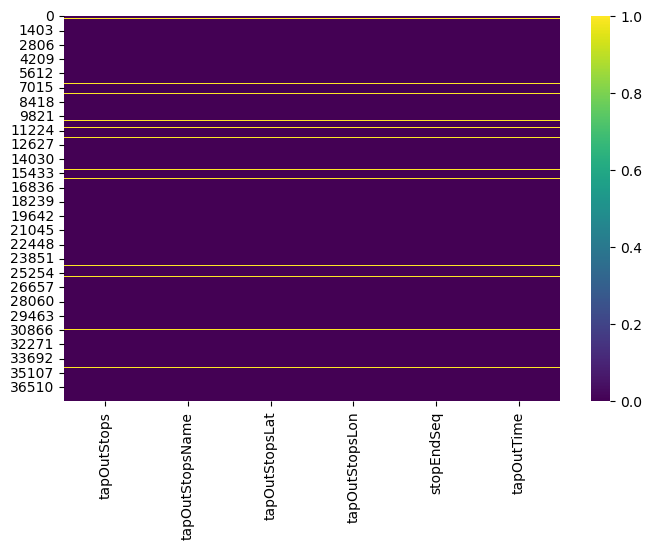

In [250]:
# Menggambarkan sebaran missing value pada kolom tapOutStops dan tapOutStopsName, tapOutStopsLat,tapOutStopsLon, stopEndSeq, dan tapOutTime
plt.figure(figsize=(8, 5))
sns.heatmap(df[['tapOutStops', 'tapOutStopsName', 'tapOutStopsLat', 'tapOutStopsLon', 'stopEndSeq','tapOutTime' ]].isnull(), cmap='viridis')
plt.show()

Proporsi missing value dari ke-6 kolom diatas memiliki jumlah yang sama banyak. Dilihat dari sebaran data pada heatmap diatas, tiap kolom yang memiliki missing value berada pada baris yang sama. Hal ini menunjukkan adanya hubungan data yang berkaitan antara satu sama lainnya.

Namun, karena belum ditemukannya solusi yang tepat guna mengisis missing value tersebut dan pada kolom tidak dapat dilakukan pengisian data secara sembarang, maka seluruh missing value dari ke-6 kolom tersebut akan dihapus.

In [251]:
df.dropna(subset=['tapOutStops',
                  'tapOutStopsName',
                  'tapOutStopsLat',
                  'tapOutStopsLon',
                  'tapOutTime',
                  'stopEndSeq'], inplace=True)

In [252]:
df.isna().sum()

transID               0
payCardID             0
payCardBank           0
payCardName           0
payCardSex            0
payCardBirthDate      0
corridorID            0
corridorName          0
direction             0
tapInStops            0
tapInStopsName        0
tapInStopsLat         0
tapInStopsLon         0
stopStartSeq          0
tapInTime             0
tapOutStops           0
tapOutStopsName       0
tapOutStopsLat        0
tapOutStopsLon        0
stopEndSeq            0
tapOutTime            0
payAmount           968
dtype: int64

### **Missing Value Treatment on `payAmount` Column**

Ketentuan dalam pembayaran tarif TransJakarta bervariatif. Berikut kriteria pembayaran tarif TransJakarta:

**Berdasarkan Jenis Armada**:
- TransJakarta (BRT): Rp3.500
- RoyalTrans: Rp20.000
- JakLingko: Rp0



In [253]:
#Fill Missing Value on 'payAmount' based on 'corridorID'

mappingRoyalTrans = df[df['payAmount'] == 20000]['corridorID'].unique()
display(mappingRoyalTrans)

mappingTJ = df.dropna(subset='corridorID')
mappingTJ = df[(df['payAmount'] == 3500) & (~df['corridorID'].str.contains('JAK'))]['corridorID'].unique()
display(mappingTJ)

mappingJakLingko = df.dropna(subset='corridorID')
mappingJakLingko = df[(df['payAmount'] == 0) & (df['corridorID'].str.contains('JAK'))]['corridorID'].unique()
display(mappingJakLingko)

array(['1T', 'B14', 'T21', 'D32', 'S31', '1P', '6C', '7C', 'B13', 'D31',
       '1K', '6P', 'S12', '1N'], dtype=object)

array(['5', '6C', 'R1A', '11D', '12', '1Q', '5M', '9A', '4', 'S22', '13',
       '9E', 'M9', 'T11', '6V', '11Q', '11', '1C', 'M1', '7E', '1P', '7D',
       '6H', '14', 'JIS3', '2', '6N', 'M11', '9N', '7P', '13B', 'M7',
       '12A', '9D', '1', 'M8', 'B21', 'M3', '8K', 'M10', '10D', 'B11',
       '8C', 'M2', '12B', '5D', '7A', '7Q', '1M', '5C', '6Q', '8E', '6M',
       'L13E', '12P', '1F', '13C', '4B', '7C', '2A', '8A', '1E', 'M4',
       '9H', '13D', '5N', '6T', '5F', '2P', 'S21', 'M12', '1N', '6U',
       '10', '2B', '10K', '6D', '6A', '4F', '6B', '5B', '3', 'M6', '8',
       '3F', 'S11', '2F', 'D32', 'M5', '1H', '4C', 'M13', '8D', '4D', '7',
       '9C', 'D21', 'D11', '8M', '1B', '7F', '6', '10H', '3E', '12H', '9',
       '1A', '11P', '11M', 'T21', 'BW9', 'M7B', '10A', '3H', '3C', '11K',
       'B13', '2Q', '1R', '7B', 'M1H'], dtype=object)

array(['JAK.03', 'JAK.46', 'JAK.88', 'JAK.16', 'JAK.02', 'JAK.15',
       'JAK.112', 'JAK.43B', 'JAK.42', 'JAK.36', 'JAK.06', 'JAK.14',
       'JAK.71', 'JAK.77', 'JAK.44', 'JAK.19', 'JAK.75', 'JAK.52',
       'JAK.37', 'JAK.31', 'JAK.43C', 'JAK.117', 'JAK.49', 'JAK.20',
       'JAK.118', 'JAK.27', 'JAK.13', 'JAK.84', 'JAK.08', 'JAK.23',
       'JAK.07', 'JAK.22', 'JAK.115', 'JAK.21', 'JAK.26', 'JAK.64',
       'JAK.47', 'JAK.01', 'JAK.120', 'JAK.85', 'JAK.10', 'JAK.41',
       'JAK.86', 'JAK.73', 'JAK.32', 'JAK.50', 'JAK.29', 'JAK.45',
       'JAK.18', 'JAK.51', 'JAK.54', 'JAK.110A', 'JAK.25', 'JAK.30',
       'JAK.39', 'JAK.80', 'JAK.11', 'JAK.17', 'JAK.58', 'JAK.34',
       'JAK.72', 'JAK.74', 'JAK.40', 'JAK.60', 'JAK.56', 'JAK.59',
       'JAK.113', 'JAK.04', 'JAK.38', 'JAK.61', 'JAK.24', 'JAK.35',
       'JAK.05', 'JAK.33', 'JAK.106', 'JAK.28', 'JAK.48B', 'JAK.53',
       'JAK.99', 'JAK.12'], dtype=object)

In [254]:
# Function to Fill Missing Value in 'payAmount' column:
def fillna_payAmount1 (row):
    if row['corridorID'] in mappingRoyalTrans and pd.isnull(row['payAmount']):
        return 20000
    elif row['corridorID'] in mappingTJ and pd.isnull(row['payAmount']):
        return 3500
    elif row['corridorID'] in mappingJakLingko and pd.isnull(row['payAmount']):
        return 0
    return row['payAmount']

df['payAmount'] = df.apply(fillna_payAmount1, axis=1)

In [255]:
df['payAmount'].isna().sum()

242

Dari 968 entries, setelah dilakukan pengisian tarif berdasarkan kategori armada, tersisa sebanyak 242 entries pada kolom `payAmount` yang masih bernilai NaN

In [256]:
df[df['payAmount'].isna()]['corridorID'].value_counts()

corridorID
JAK.48A    242
Name: count, dtype: int64

Seluruh entries pada kolom `corridorID` dengan value 'JAK.48A' memiliki missing value pada kolom `payAmount`.

Berdasarkan informasi tersebut, diketahui bahwa armada yang digunakan adalah JakLingko dengan kode armada di depannya yaitu 'JAK', maka sisa data missing value di kolom `payAmount` akan di isi dengan nilai 0. 

In [257]:
#Fill Missing Value 'payAmount' based on 'corridorID' with condition the values are 'JAK.48A'
df.loc[(df['corridorID'] == 'JAK.48A') & (df['payAmount'].isna()), 'payAmount'] = 0

### **Checking Missing Value After Treatments**

In [258]:
df.isna().sum()

transID             0
payCardID           0
payCardBank         0
payCardName         0
payCardSex          0
payCardBirthDate    0
corridorID          0
corridorName        0
direction           0
tapInStops          0
tapInStopsName      0
tapInStopsLat       0
tapInStopsLon       0
stopStartSeq        0
tapInTime           0
tapOutStops         0
tapOutStopsName     0
tapOutStopsLat      0
tapOutStopsLon      0
stopEndSeq          0
tapOutTime          0
payAmount           0
dtype: int64

Seluruh data missing value sudah dibersihkan, dan dapat digunakan untuk dianalisa lebih lanjut.

## **Add New Columns**

### **`ageGroup` Column**

Age Group by Generation:
- Baby Boomer born 1946 - 1964
- Generation X born 1965-1979
- Millenials born 1980-1994
- Generation Z bron 1995-2012

Source: https://libguides.usc.edu/busdem/age

In [259]:
# Add 'ageGroup' column
def ageband (age):
    if age >= 1946 and age <= 1964:
        return 'Baby Boomer'
    elif age >= 1965 and age <= 1979:
        return 'Generation X'
    elif age >= 1980 and age <= 1994:
        return 'Millenials'
    elif age >= 1995 and age <=2012:
        return 'Generation Z'
    
df['ageGroup'] = df['payCardBirthDate'].apply(ageband)

### **`tripDuration` Column**

In [260]:
# Add 'tripDuration' column
# Durasi dalam menit
differenceDuration = df['tapOutTime'] - df['tapInTime']
df['tripDuration'] = (differenceDuration/np.timedelta64(1,'m')).astype('int')

### **`tripDay` Column**

In [261]:
# Add 'tripDay' column
df['tripDay'] = df['tapInTime'].dt.day_name()

### **`tapInHour` Column**

In [262]:
# Add 'tapInHour' column
df['tapInHour'] = df['tapInTime'].dt.hour

### **`tapOutHour` Column**

In [263]:
# Add 'tapOutHour' column
df['tapOutHour'] = df['tapOutTime'].dt.hour

### **`vehicleType` Column**

In [264]:
# Add 'vehicleType' column
def vehicle (fare):
    if fare == 3500:
        return 'TransJakarta'
    elif fare == 20000:
        return 'RoyalTrans'
    elif fare == 0:
        return 'JakLingko'

df['vehicleType'] = df['payAmount'].apply(vehicle)

## **Clean Data**

In [265]:
df.to_csv('cleanTransjakarta.csv', index=False)

In [266]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36524 entries, 0 to 37899
Data columns (total 28 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   transID           36524 non-null  object        
 1   payCardID         36524 non-null  int64         
 2   payCardBank       36524 non-null  object        
 3   payCardName       36524 non-null  object        
 4   payCardSex        36524 non-null  object        
 5   payCardBirthDate  36524 non-null  int64         
 6   corridorID        36524 non-null  object        
 7   corridorName      36524 non-null  object        
 8   direction         36524 non-null  float64       
 9   tapInStops        36524 non-null  object        
 10  tapInStopsName    36524 non-null  object        
 11  tapInStopsLat     36524 non-null  float64       
 12  tapInStopsLon     36524 non-null  float64       
 13  stopStartSeq      36524 non-null  int64         
 14  tapInTime         36524 non

**CLEAN DATA SUMMARY:**
- After cleaning, the data now have **36524 rows** and **29 columns**
- Every missing value has been treated on every columns
- `tapInTime` and `tapOutTime` data type has been changed into datetime
- Seven columns are added to the data frame, such as: `ageCustomer`, `ageGroup`, `tripDuration`, `tripDay`, `tapInHour`, `tapOutHour`, and `vehicleType`

# **DATA ANALYSIS**

## **User Demographic**

### **Age Distribution**

,ageGroup,count
0,Millenials,16341
1,Generation Z,13410
2,Generation X,5972
3,Baby Boomer,801


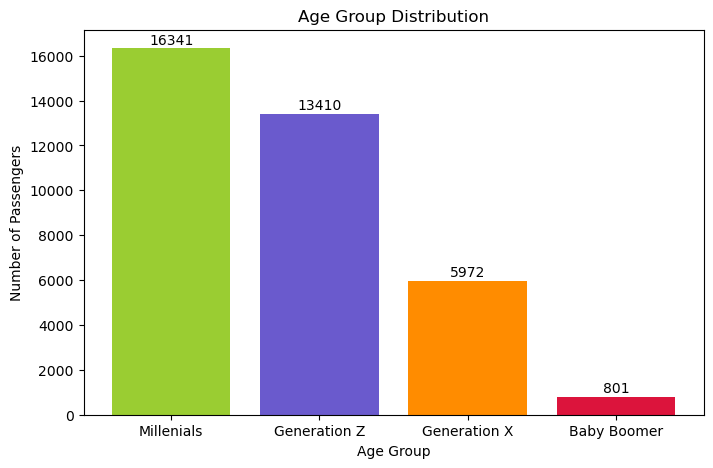

In [267]:
# Age Distribution
age = df['ageGroup'].value_counts().reset_index()
display(age)

plt.figure(figsize=(8,5))
plt.bar(age['ageGroup'], age['count'], color=['yellowgreen', 
                                              'slateblue',
                                              'darkorange',
                                              'crimson',
                                              'dodgerblue'])
plt.title('Age Group Distribution')
plt.xlabel('Age Group')
plt.ylabel('Number of Passengers')

for i, count in enumerate(age['count']):
    plt.text(i, count + 50, str(count), ha='center', va='bottom')

plt.show()

**Summary Age Demographic :**
- Millenials constitute the largest age group with total of 16341 passengers and followed by Generaztion Z with total of 13410 passenger.
- Generation X total passengers are 5972
- The smallest age group are Baby Boomer with total of 801 passengers
- This indicates that the majority passenger fall within the Millenials and Generation Z age groups.
- As of today, both Millenials and Gen Z are in their most productive time. These group tends to commute more often to go to school or work.
- For the older generation, the Baby Boomer and Gen X group they are less tend to commute to work, and getting closer to retirement so their group are not as productive as the younger generation.

### **Gender Distribution**

,payCardSex,payCardID,sexProportion
0,F,19456,53.269083
1,M,17068,46.730917


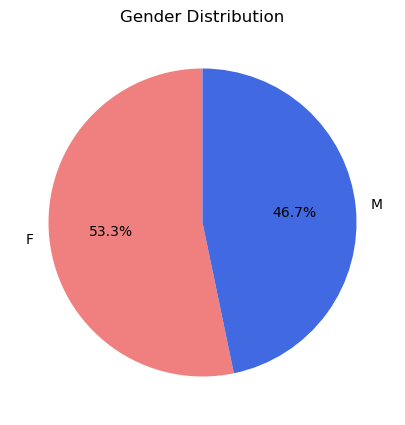

In [268]:
# Gender Proportion
gender = df.groupby('payCardSex')['payCardID'].count().reset_index()
gender['sexProportion'] = (gender['payCardID']/gender['payCardID'].sum())*100

display(gender)

plt.figure(figsize=(8,5))
plt.pie(gender['sexProportion'], labels=gender['payCardSex'], autopct='%1.1f%%', startangle=90, colors=['lightcoral', 'royalblue'])
plt.title('Gender Distribution')
plt.show()

**Summary Gender Demographic :**
- Female proportion are bigger than the male proportion as Transjakarta user with 53.3% and Male for 46.7%.

### **Bank Card Distribution**

,payCardBank,count
0,dki,18038
1,emoney,6634
2,brizzi,3397
3,flazz,3104
4,online,2771
5,bni,2580


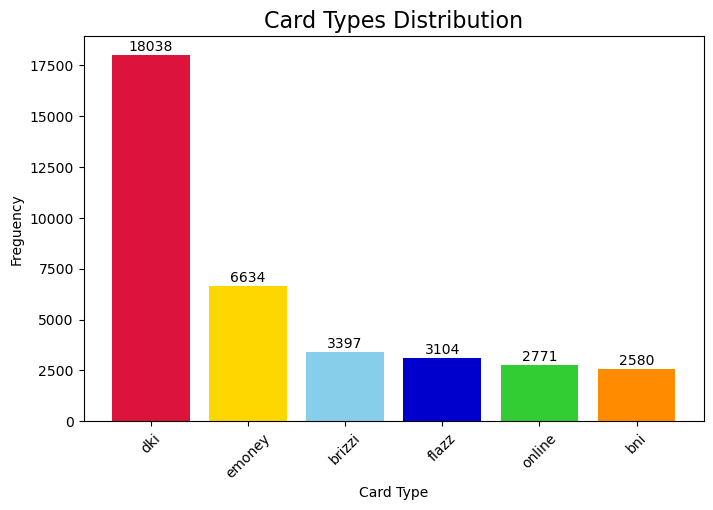

In [269]:
card = df['payCardBank'].value_counts().reset_index()
display(card)

plt.figure(figsize=(8,5))
plt.bar(card['payCardBank'], card['count'], color=['crimson',
                                                   'gold',
                                                   'skyblue',
                                                   'mediumblue',
                                                   'limegreen',
                                                   'darkorange'])
plt.title('Card Types Distribution', size=16)
plt.xlabel('Card Type')
plt.ylabel('Freguency')
plt.xticks(rotation=45)

for i, count in enumerate(card['count']):
    plt.text(i, count + 50, str(count), ha='center', va='bottom')

plt.show()

**Summary Card Bank Demographic :**
- Most payment card used by the user are DKI and highly dominated the transaction in Transjakarta with total of 18.038 transaction. Not only using electronic money,TransJakarta also use online payment with their own mobile application known as 'Tije'.

Source:
https://www.kompasiana.com/joycew9619/63450fc908a8b552f96eda42/sistem-baru-ticketing-bus-transjakarta

### **Vehicle Type Distribution**

,vehicleType,count,proportion
0,TransJakarta,18413,50.413427
1,JakLingko,16422,44.962217
2,RoyalTrans,1689,4.624357


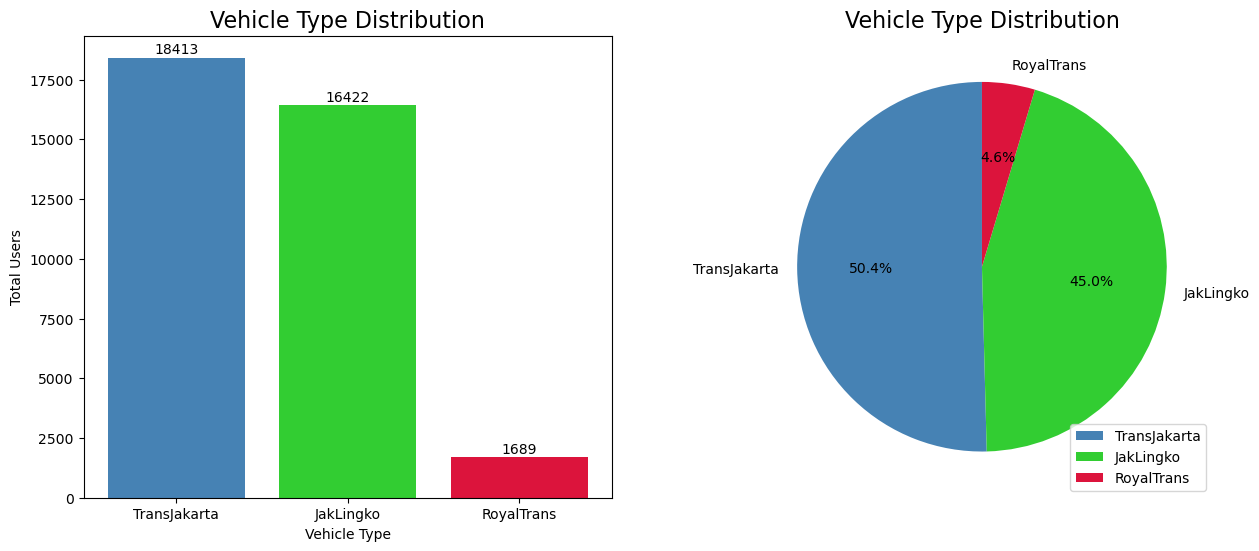

In [270]:
# Vehicle Type User Distribution
vehicle = df['vehicleType'].value_counts().reset_index()
vehicle['proportion'] = (vehicle['count']/vehicle['count'].sum())*100
display(vehicle)

plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
plt.bar(vehicle['vehicleType'], vehicle['count'], color=['steelblue', 'limegreen', 'crimson'])
plt.title('Vehicle Type Distribution', size=16)
plt.xlabel('Vehicle Type')
plt.ylabel('Total Users')

for i, count in enumerate(vehicle['count']):
    plt.text(i, count + 50, str(count), ha='center', va='bottom')

plt.subplot(1,2,2)
plt.pie(vehicle['proportion'], labels=vehicle['vehicleType'], autopct='%1.1f%%', startangle=90, colors=['steelblue', 'limegreen', 'crimson'])
plt.title('Vehicle Type Distribution', size=16)
plt.legend(loc='lower right')

plt.show()

**Summary of Vehicle Type:**
- TransJakarta has the highest proportion with total of 50.41%, and followed by JakLinkgo with total 44.96% and RoyalTrand with the lowest total 4.62%.
- It shows that TransJakarta and JakLingko are the dominant vehicle types used by passengers.

## **Weekdays: Peak Time, Route, and Bus Stops Analysis**

In [271]:
# Seperating entries in weekday and weekend
weekdays = df[df['tripDay'].isin(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'])]
weekends = df[df['tripDay'].isin(['Saturday', 'Sunday'])]

### **Weekdays - Peak Time**

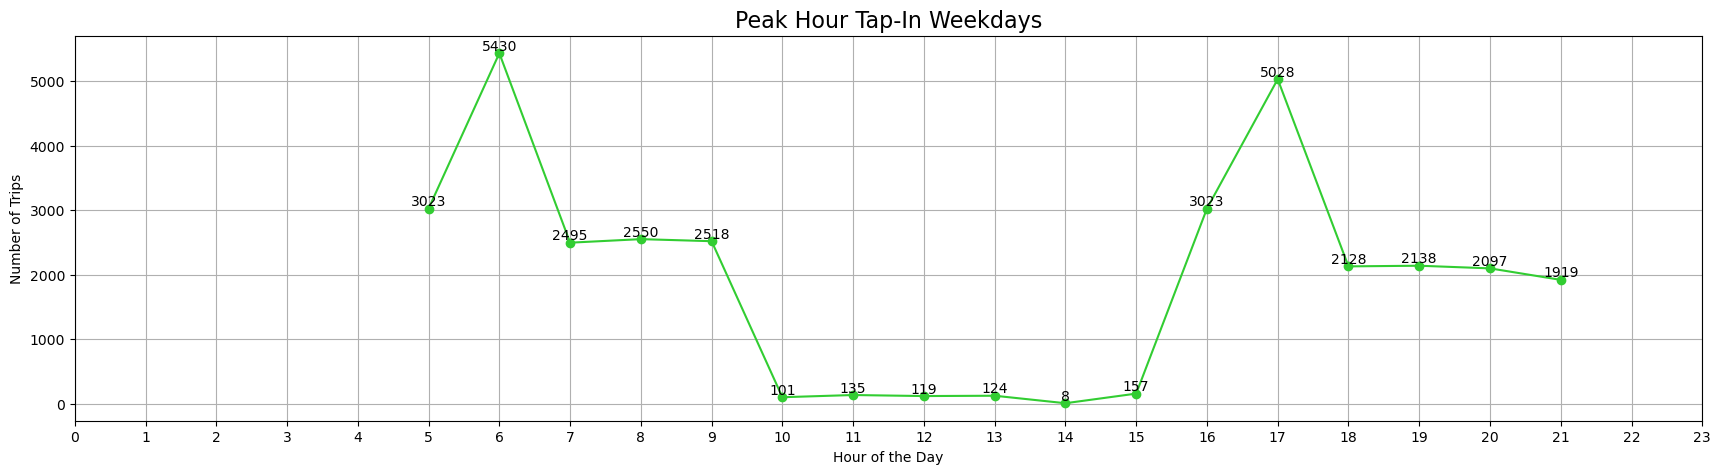

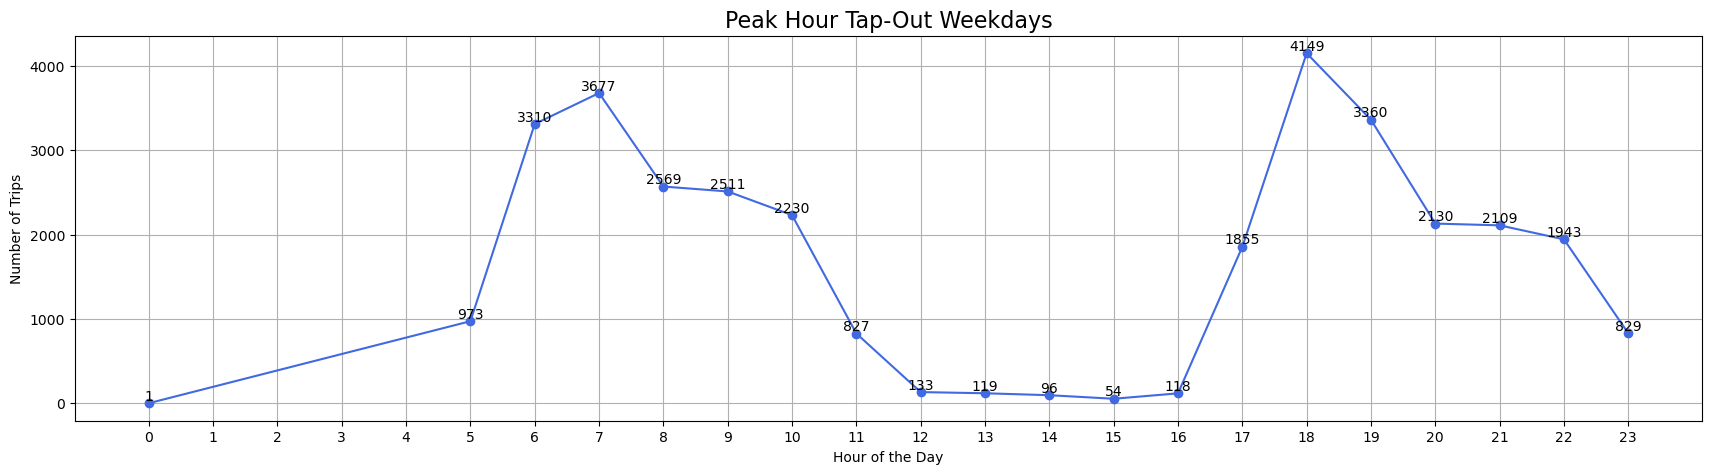

In [272]:
# Peak Time In on Weekdays
peakTimeIn_Weekdays = weekdays['tapInHour'].value_counts().sort_index()

plt.figure(figsize=(21, 5))

plt.plot(peakTimeIn_Weekdays.index, peakTimeIn_Weekdays.values, marker='o', color='limegreen')
plt.title('Peak Hour Tap-In Weekdays', size=16)
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Trips')
plt.xticks(range(24))

for x, y in zip(peakTimeIn_Weekdays.index, peakTimeIn_Weekdays.values):
    plt.text(x, y, str(y), ha='center', va='bottom', size=10)

plt.grid(True)

# Peak Time Out on Weekdays
peakTimeOut_Weekdays = weekdays['tapOutHour'].value_counts().sort_index()

plt.figure(figsize=(21, 5))
plt.plot(peakTimeOut_Weekdays.index, peakTimeOut_Weekdays.values, marker='o', color='royalblue')
plt.title('Peak Hour Tap-Out Weekdays', size=16)
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Trips')
plt.xticks(range(24))

for x, y in zip(peakTimeOut_Weekdays.index, peakTimeOut_Weekdays.values):
    plt.text(x, y, str(y), ha='center', va='bottom', size=10)

plt.grid(True)

plt.show()

**Summary Peak Time in Weekdays:**
- The Morning Rush Hour starts at **05.00 to 09.00**, with the peak hour at 06.00.
- The Evening Rush Hour starts at **16.00 to 20.00**, with the peak hour at 17.00.
- The Morning Rush Hour starts at **05.00 to 09.00**, with the peak hour at 07.00.
- The Evening Rush Hour starts at **16.00 to 20.00**, with the peak hour at 18.00.
- Overall tap-in and tap-out are highest during morning and evening commuting hours, these are the busiest times for public transportation usage. Also, indicating less demand for public transportation during midday and early afternoon hours in weekdays.
- During morning rush, commuters travel from their homes to their workplace, schools, or  other destinations, leading to heavy traffic on roads and increased demand for public transportation.
- Similar to the morning rush, the evening rush is marked by a surge in commuter activity as people leave their workplaces, schools, or other locations and travel back to their homes or other destinations.

### **Weekdays - Morning Rush**

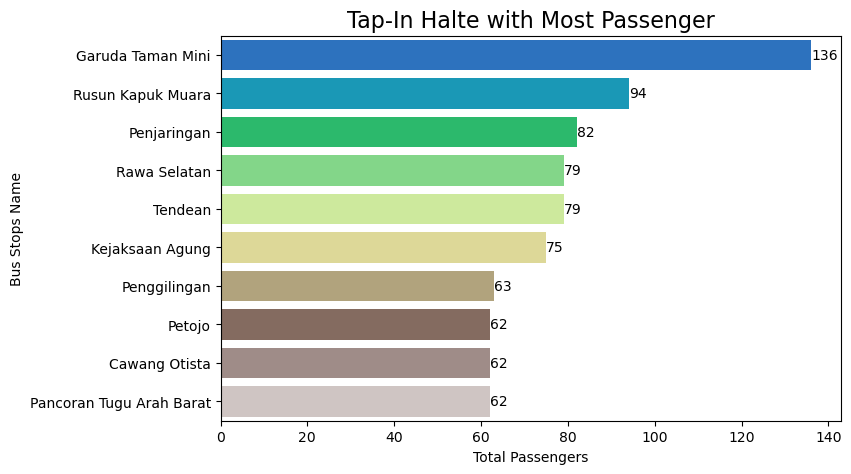

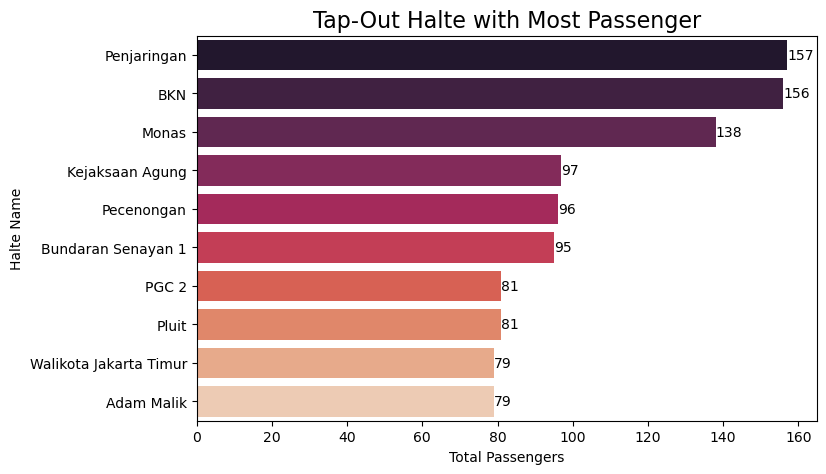

In [273]:
# Most Tap-In Halte in Morning Rush Hour (05.00 - 09.00)
morningRush =weekdays[weekdays['tapInHour'].isin([5,6,7,8,9])]
tapIn_morningStops = morningRush[['tapInStopsLat', 'tapInStopsLon', 'tapInStopsName']].value_counts().reset_index().head(10)

plt.figure(figsize=(8,5))
sns.barplot(x=tapIn_morningStops['count'], y=tapIn_morningStops['tapInStopsName'], palette='terrain')
plt.title('Tap-In Halte with Most Passenger', size=16)
plt.xlabel('Total Passengers')
plt.ylabel('Bus Stops Name')

for i, count in enumerate(tapIn_morningStops['count']):
    plt.text(count, i, str(count), ha='left', va='center')

# Most Tap-Out Halte in Morning Rush Hour (05.00 - 09.00)
tapOut_morningStops = morningRush[['tapOutStopsLat', 'tapOutStopsLon', 'tapOutStopsName']].value_counts().reset_index().head(10)

plt.figure(figsize=(8,5))
sns.barplot(x=tapOut_morningStops['count'], y=tapOut_morningStops['tapOutStopsName'], palette='rocket')
plt.title('Tap-Out Halte with Most Passenger', size=16)
plt.xlabel('Total Passengers')
plt.ylabel('Halte Name')

for i, count in enumerate(tapOut_morningStops['count']):
    plt.text(count, i, str(count), ha='left', va='center')
    
plt.show()

In [274]:
# Folium from Tap-In and Tap-Out in Morning Rush Weekdays
morningMap_wd = folium.Map(tiles='CartoDB Voyager',
                       location=[weekdays.tapInStopsLat.mean(),
                                 weekdays.tapInStopsLon.mean()],
                                 zoom_start=12,
                                 control_scale=True)

# Tap In Morning
for i, loc_halte in tapIn_morningStops.iterrows():
    folium.Marker([loc_halte['tapInStopsLat'],
                   loc_halte['tapInStopsLon']],
                   popup=loc_halte['tapInStopsName'],
                   icon=folium.Icon(color='lightgreen')).add_to(morningMap_wd)

# Tap Out Morning
for i, loc_halte in tapOut_morningStops.iterrows():
    folium.Marker([loc_halte['tapOutStopsLat'],
                   loc_halte['tapOutStopsLon']],
                   popup=loc_halte['tapOutStopsName'],
                   icon=folium.Icon(color='purple')).add_to(morningMap_wd)
    
morningMap_wd

**Summary Morning Rush:**
- **Garuda Taman Mini** becomes the busiest tap-in stop during the morning rush with 136 passengers, indicating a high number of passengers starting their activities from that stop.
- Meanwhile, the busiest tap-out stop during the morning rush is **Penjaringan** with 157 passengers, and with only one passenger difference from **BKN** stop with 156 passengers. These stops indicate the high number of passengers intending to disembark at these stops to reach their destinations in the morning.
- **Penjaringan and Kejaksaan Agung** stops stand out as the busiest bus stops owing to their significant passenger traffic, consistently witnessing high levels of congestion during both boarding and disembarkation.
- From the tap-in and tap-out stops during the morning rush, it is known that the locations of the stops vary but are dominated by areas in **East Jakarta and South Jakarta**, including: 
    1) Garuda Taman Mini stop, 
    2) Penggilingan, 
    3) Cawang Otista, 
    4) PGC 2, 
    5) Walikota Jakarta Timur, 
    6) BKN Kejaksaan Agung, 
    7) Pancoran Tugu Arah Barat, 
    8) Tendean, 
    9) Bundaran Senayan 1,
    10) Adam Malik.

### **Weekdays - Evening Rush**

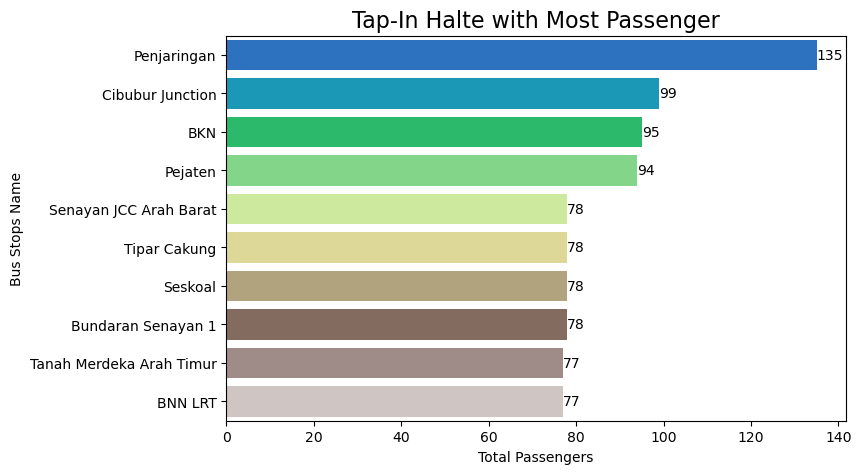

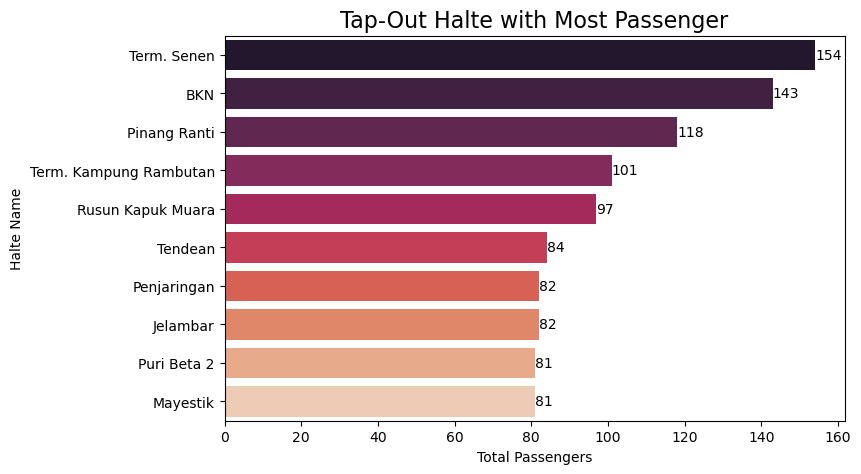

In [275]:
# Most Tap-In Halte in Evening Rush Hour (16.00 - 21.00)
eveningRush = weekdays[weekdays['tapInHour'].isin([16,17,18,19,20,21])]
tapIn_eveRush = eveningRush[['tapInStopsLat', 'tapInStopsLon', 'tapInStopsName']].value_counts().reset_index().head(10)

plt.figure(figsize=(8,5))
sns.barplot(x=tapIn_eveRush['count'], y=tapIn_eveRush['tapInStopsName'], palette='terrain')
plt.title('Tap-In Halte with Most Passenger', size=16)
plt.xlabel('Total Passengers')
plt.ylabel('Bus Stops Name')

for i, count in enumerate(tapIn_eveRush['count']):
    plt.text(count, i, str(count), ha='left', va='center')

# Most Tap-Out Halte in Evening Rush Hour (16.00 - 21.00)
tapOut_eveRush = eveningRush[['tapOutStopsLat', 'tapOutStopsLon', 'tapOutStopsName']].value_counts().reset_index().head(10)

plt.figure(figsize=(8,5))
sns.barplot(x=tapOut_eveRush['count'], y=tapOut_eveRush['tapOutStopsName'], palette='rocket')
plt.title('Tap-Out Halte with Most Passenger', size=16)
plt.xlabel('Total Passengers')
plt.ylabel('Halte Name')

for i, count in enumerate(tapOut_eveRush['count']):
    plt.text(count, i, str(count), ha='left', va='center')
    
plt.show()

In [276]:
# Folium from Tap-In and Tap-Out in Evening Rush Weekdays
eveingnMap_wd = folium.Map(tiles='CartoDB Voyager',
                       location=[weekdays.tapInStopsLat.mean(),
                                 weekdays.tapInStopsLon.mean()],
                                 zoom_start=11.5,
                                 control_scale=True)

# Tap In Evening
for i, loc_halte in tapIn_eveRush.iterrows():
    folium.Marker([loc_halte['tapInStopsLat'],
                   loc_halte['tapInStopsLon']],
                   popup=loc_halte['tapInStopsName'],
                   icon=folium.Icon(color='lightgreen')).add_to(eveingnMap_wd)

# Tap Out Evening
for i, loc_halte in tapOut_eveRush.iterrows():
    folium.Marker([loc_halte['tapOutStopsLat'],
                   loc_halte['tapOutStopsLon']],
                   popup=loc_halte['tapOutStopsName'],
                   icon=folium.Icon(color='purple')).add_to(eveingnMap_wd)
    
eveingnMap_wd

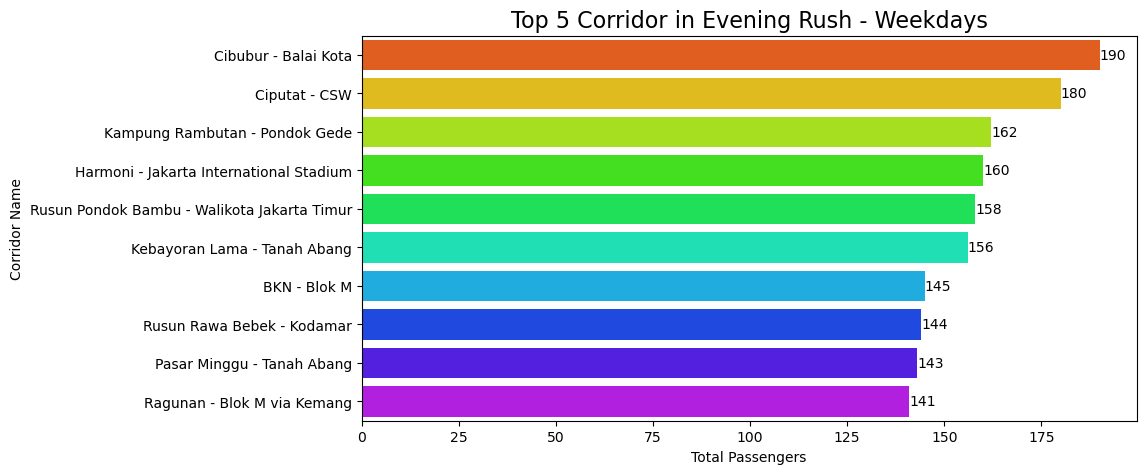

In [277]:
# Top 10 Corridor/Route in Evening Rush
top_evening_corridor = eveningRush[['corridorID','corridorName']].value_counts().reset_index().head(10)
# display(top_evening_corridor)

plt.figure(figsize=(10,5))
sns.barplot(x=top_evening_corridor['count'], y=top_evening_corridor['corridorName'], palette='gist_rainbow')
plt.title('Top 5 Corridor in Evening Rush - Weekdays', size=16)
plt.xlabel('Total Passengers')
plt.ylabel('Corridor Name')

for i, count in enumerate(top_evening_corridor['count']):
    plt.text(count, i, str(count), ha='left', va='center')
    
plt.show()

**Summary Evening Rush:**
- **Penjaringan** becomes the busiest tap-in stop during the evening rush with 135 passengers, indicating a high number of passengers starting their activities from that stop.
- Meanwhile, the busiest tap-out stop during the evening rush is **Term. Senen** with 154 passengers. This suggests that during the evening rush hours, many passengers disembark at these locations, indicating significant passenger traffic towards these destinations during this time period. 
- From the tap-in and tap-out stops during the evening rush, it is known that the locations of the stops vary but are dominated by areas in **East Jakarta**: 
    1) Tipar Cakung,
    2) BNN LRT,
    3) Cibubur Junction,
    4) BKN,
    5) Tanah Merdeka Arah Timur,
    6) Pinang Ranti
    7) Term. Kampung Rambutan

### **Weekdays Top 10 Route Analysis**

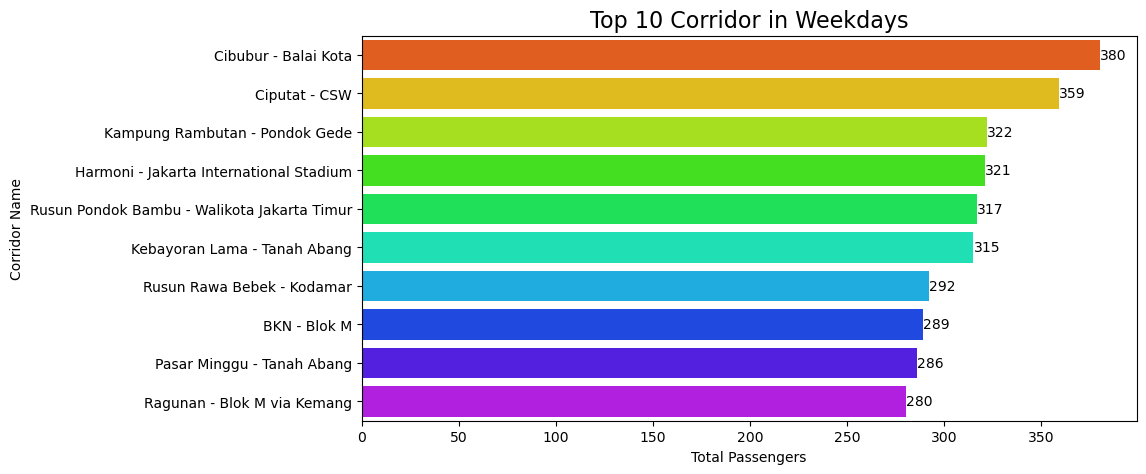

In [278]:
# Top 10 Corridor/Route TransJakarta in Morning Rush

top_corridor_wd = weekdays[['corridorID', 'corridorName']].value_counts().reset_index().head(10)
# display(top_corridor_wd)

plt.figure(figsize=(10,5))
sns.barplot(x=top_corridor_wd['count'], y=top_corridor_wd['corridorName'], palette='gist_rainbow')
plt.title('Top 10 Corridor in Weekdays', size=16)
plt.xlabel('Total Passengers')
plt.ylabel('Corridor Name')

for i, count in enumerate(top_corridor_wd['count']):
    plt.text(count, i, str(count), ha='left', va='center')
    
plt.show()

**Summary Top 10 Corridor in Weekdays:**
- Corridors such as Cibubur - Balai Kota (1T), Ciputat - CSW (S21), and Kampung Rambutan - Pondok Gede (JAK.06) have relatively high counts, suggesting significant demand and utilization during weekdays.
- The high counts on certain corridors suggest that they are essential routes for weekday commuters, likely connecting residential areas with employment centers, educational institutions, or commercial districts.

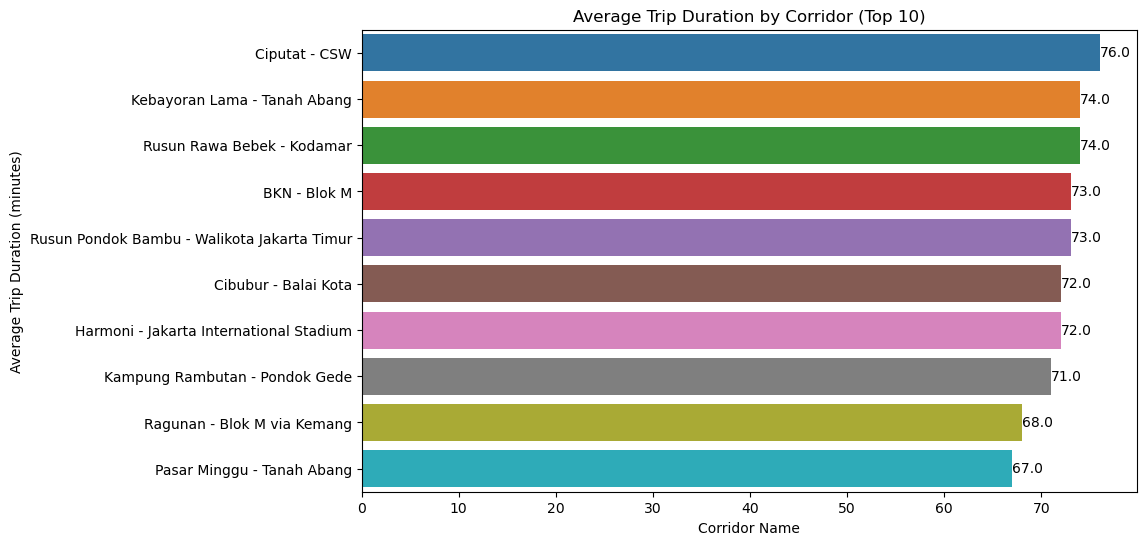

In [279]:
# Average Trip Duration by Corridor (Top 10)
top10_route = weekdays[weekdays['corridorID'].isin(['1T', 'S21', 'JAK.06', '11P', 'JIS3', '11P', '8C', '2E', 'M7B', '9D', '6N'])]
corridor_trip_durations = (top10_route.groupby('corridorName')['tripDuration'].mean().round()).reset_index().sort_values('tripDuration', ascending=False)
# display(corridor_trip_durations)

# Plotting average trip durations for different corridors
plt.figure(figsize=(10, 6))
sns.barplot(x=corridor_trip_durations['tripDuration'],
            y=corridor_trip_durations['corridorName'])
plt.title('Average Trip Duration by Corridor (Top 10)')
plt.xlabel('Corridor Name')
plt.ylabel('Average Trip Duration (minutes)')

for i, count in enumerate(corridor_trip_durations['tripDuration']):
    plt.text(count, i, str(count), ha='left', va='center')

plt.show()

**Summary of Average Trip Duration on Top 10 Corridor:**
- The average trip durations for the top 10 corridors, ranging from 67 to 76 minutes, generally fall within the majority travel time range of 30 to 120 minutes. Source: https://pacmann.io/blog/data-waktu-tempuh-pekerja-kantoran-di-jabodetabek-selama-ramadan
- The range of trip durations across different corridors highlights the diverse travel patterns and commuting experiences within Jakarta. Factors such as distance, traffic conditions, accessibility, and mode of transportation contribute to this variability.
- The consistent tendency of travel durations around 75 minutes indicates a common commuting experience for many residents. This information is valuable for transportation planners and policymakers to prioritize investments and interventions to improve transportation infrastructure and efficiency along these corridors.

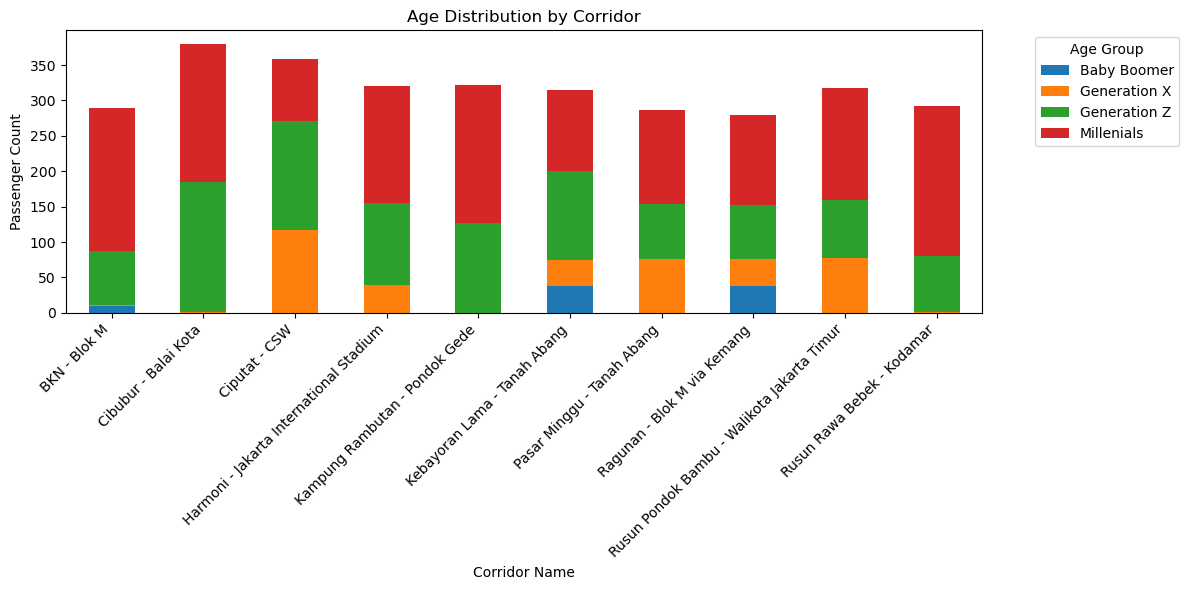

In [280]:
age_distribution_by_corridor = top10_route.groupby(['corridorName', 'ageGroup']).size().unstack(fill_value=0)
# display(age_distribution_by_corridor)

ax = age_distribution_by_corridor.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Age Distribution by Corridor')
plt.xlabel('Corridor Name')
plt.ylabel('Passenger Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Age Group', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

plt.show()

**Summary of Age Distribution by Corridor:**
- Millenials appear to be the most prevalent age group. Foloowed by Gen Z also shows a significant presence, especially in corridors like "Cibubur - Balai Kota," "Ciputat - CSW," and "Kampung Rambutan - Pondok Gede."
- Gen X and Baby Boomer numbers appear to be relatively smaller compared to the younger generation.
- The distribution of age groups suggests that public transportation services cater to a diverse demographic, including both younger and older age groups.

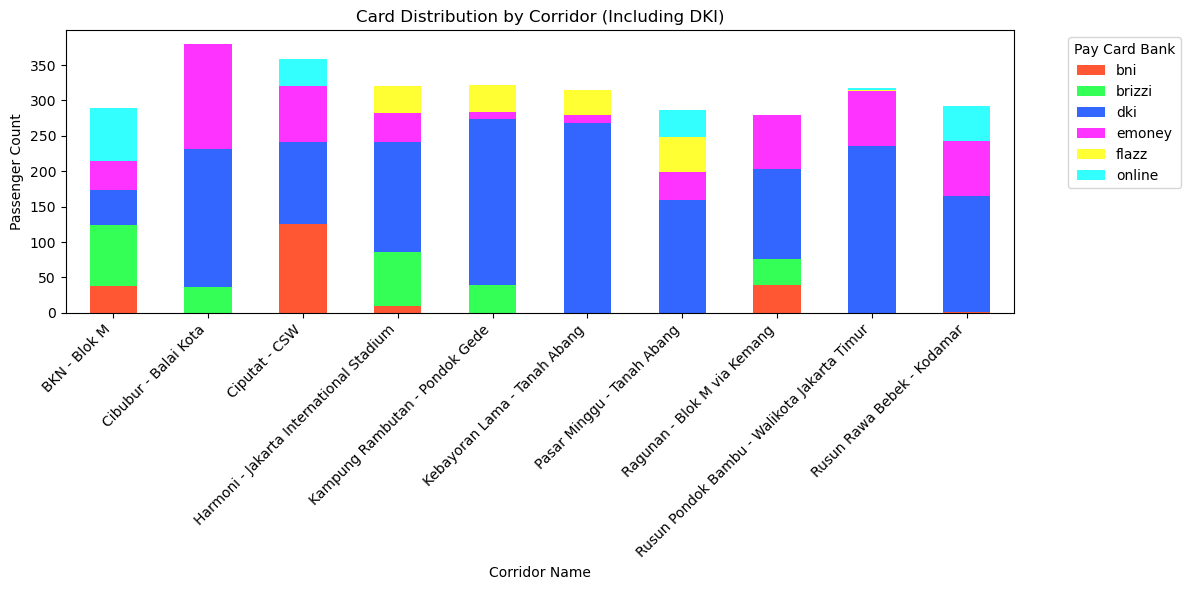

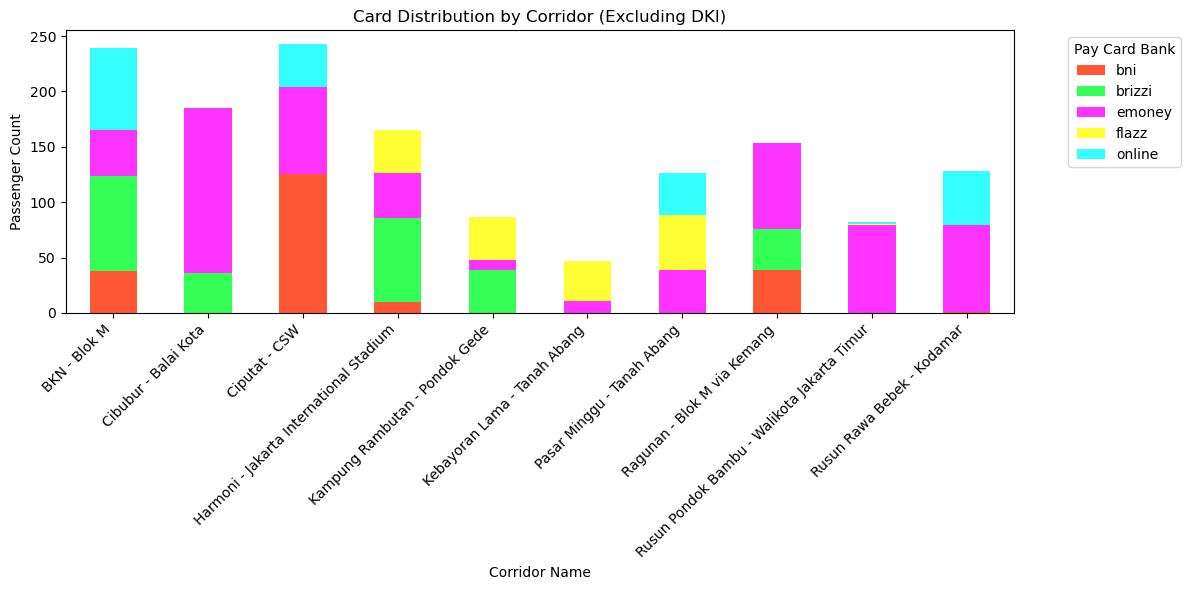

In [281]:
# Top Card Payment Except DKI in Top 10 Corridor
top10_route_filtered = top10_route[top10_route['payCardBank'] != 'dki']


card_distribution_withDKI = top10_route.groupby(['corridorName', 'payCardBank']).size().unstack(fill_value=0)
card_distribution_noDKI = top10_route_filtered.groupby(['corridorName', 'payCardBank']).size().unstack(fill_value=0)
# display(card_distribution_noDKI, card_distribution_withDKI)

# Plotting the card distribution for each corridor
ax = card_distribution_withDKI.plot(kind='bar', stacked=True, figsize=(12, 6), color=['#FF5733', '#33FF57','#3366FF', '#FF33FF', '#FFFF33', '#33FFFF'])
plt.title('Card Distribution by Corridor (Including DKI)')
plt.xlabel('Corridor Name')
plt.ylabel('Passenger Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Pay Card Bank', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

ax = card_distribution_noDKI.plot(kind='bar', stacked=True, figsize=(12, 6), color=['#FF5733', '#33FF57','#FF33FF', '#FFFF33', '#33FFFF'])
plt.title('Card Distribution by Corridor (Excluding DKI)')
plt.xlabel('Corridor Name')
plt.ylabel('Passenger Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Pay Card Bank', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

plt.show()


**Summary Card Distribution by Corridor:**
- DKI card are leading as the most card payment used by passengers. But looking throught the card payment except DKI card, e-money are the external card payment that widely used by the commuters.
- Online payment (Tije) user are started to show as payment method in several corridor, such as: BKN - Blok M, Ciputat - CSW, Pasar Minggu - Tanah Abang, and Rusun Rawa Bebek - Kodamar.
- Others payment method such as BNI, brizzi, and flazz are also still widely use in several corridor.

## **Weekend: Peak Time, Route, and Bus Stops Analysis**

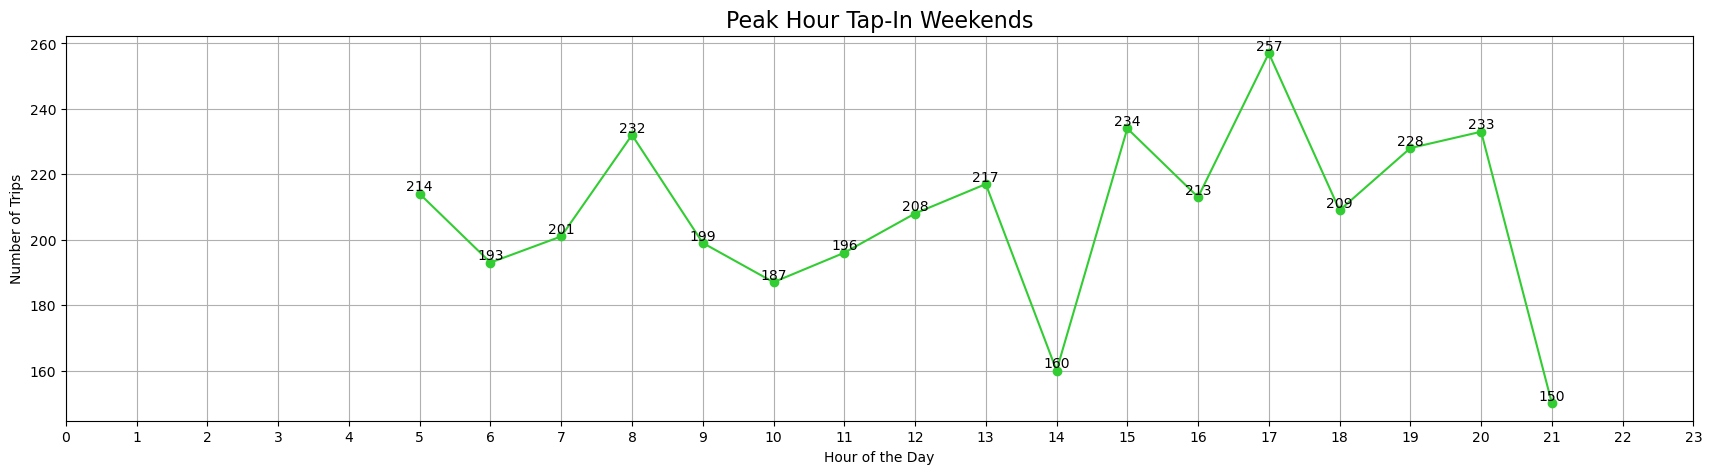

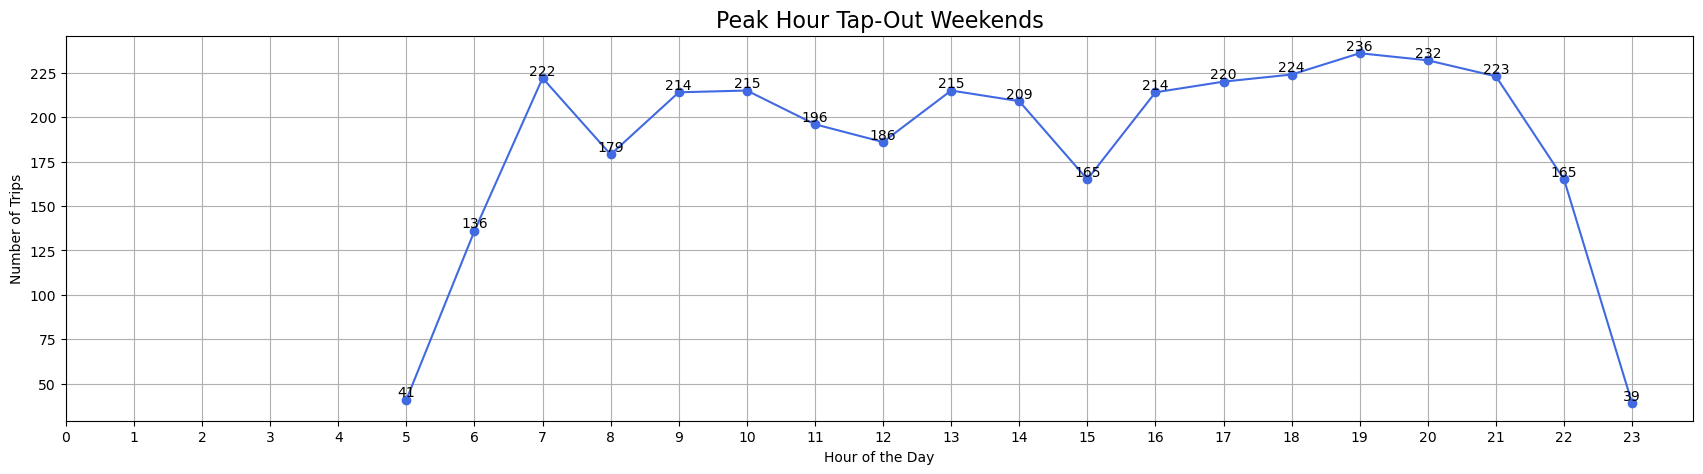

In [282]:
# Peak Time In on Weekdays
peakTimeIn_weekends = weekends['tapInHour'].value_counts().sort_index()

plt.figure(figsize=(21, 5))

plt.plot(peakTimeIn_weekends.index, peakTimeIn_weekends.values, marker='o', color='limegreen')
plt.title('Peak Hour Tap-In Weekends', size=16)
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Trips')
plt.xticks(range(24))

for x, y in zip(peakTimeIn_weekends.index, peakTimeIn_weekends.values):
    plt.text(x, y, str(y), ha='center', va='bottom', size=10)

plt.grid(True)

# Peak Time Out on Weekdays
peakTimeOut_weekends = weekends['tapOutHour'].value_counts().sort_index()

plt.figure(figsize=(21, 5))
plt.plot(peakTimeOut_weekends.index, peakTimeOut_weekends.values, marker='o', color='royalblue')
plt.title('Peak Hour Tap-Out Weekends', size=16)
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Trips')
plt.xticks(range(24))

for x, y in zip(peakTimeOut_weekends.index, peakTimeOut_weekends.values):
    plt.text(x, y, str(y), ha='center', va='bottom', size=10)

plt.grid(True)

plt.show()

# display(peakTimeIn_Weekdays, peakTimeOut_Weekdays)

**Summary Peak Time in Weekends:**
- Tap-In and Tap-Out Hour during weekend shows a fluktuative patterns, with peak tap In hour at 17.00 and peak tap-out hour at 19.00. Indicating, most user use transjakarta services during the end of the day to go back.
- The pattern above shows during weekends the frequency of Tap-In and Tap-Out in are relatively smaller than during weekends, indicating most commuters didn't use TransJakarta transportation aas often in weekdays.
- Commuting activity are lower during weekends, indicating most user rarely use TransJakarta services during weekends for doing leisure activity.

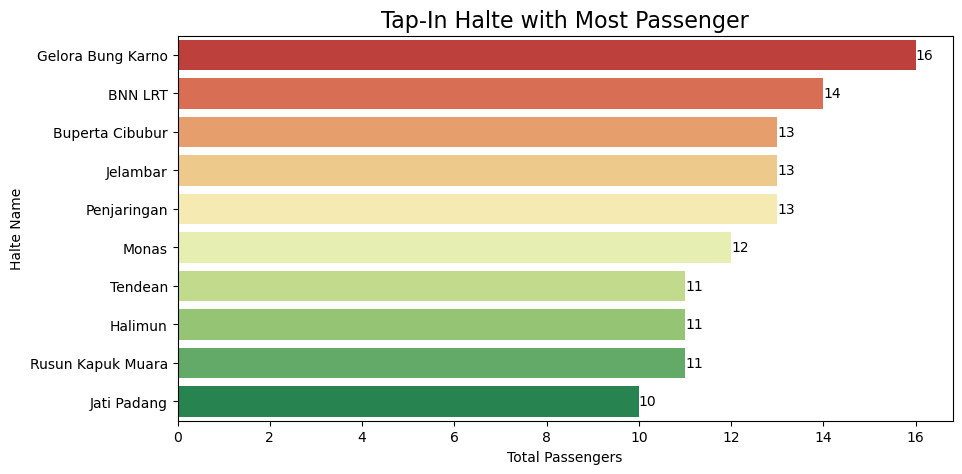

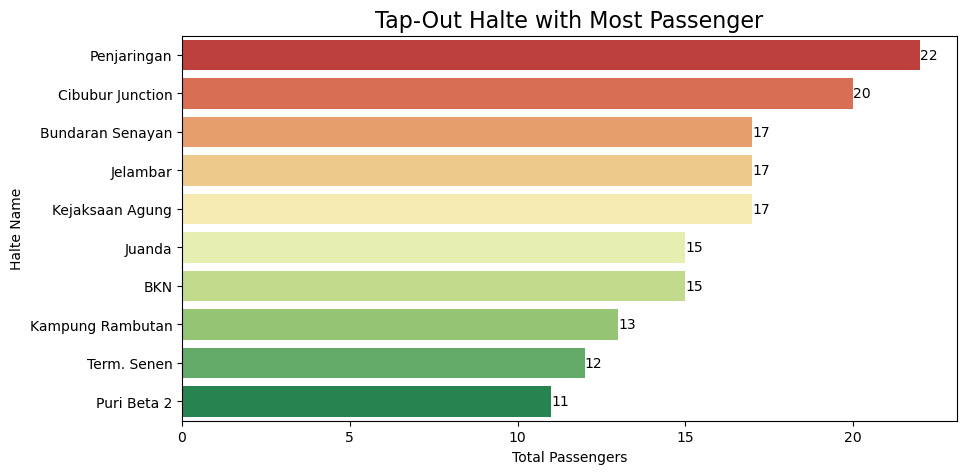

In [283]:
# Most Tap In Halte Weekends
tapIn_weekend = weekends[['tapInStopsLat', 'tapInStopsLon', 'tapInStopsName']].value_counts().reset_index().head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=tapIn_weekend['count'], y=tapIn_weekend['tapInStopsName'], palette='RdYlGn')
plt.title('Tap-In Halte with Most Passenger', size=16)
plt.xlabel('Total Passengers')
plt.ylabel('Halte Name')

for i, count in enumerate(tapIn_weekend['count']):
    plt.text(count, i, str(count), ha='left', va='center')
    
plt.show()

# Most Tap Out Halte Weekends
tapOut_weekend = weekends[['tapOutStopsLat', 'tapOutStopsLon', 'tapOutStopsName']].value_counts().reset_index().head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=tapOut_weekend['count'], y=tapOut_weekend['tapOutStopsName'], palette='RdYlGn')
plt.title('Tap-Out Halte with Most Passenger', size=16)
plt.xlabel('Total Passengers')
plt.ylabel('Halte Name')

for i, count in enumerate(tapOut_weekend['count']):
    plt.text(count, i, str(count), ha='left', va='center')
    
plt.show()
# display(tapIn_weekend, tapOut_weekend)

In [284]:
# Folium Map Tap In Weekends
map_weekend = folium.Map(tiles='CartoDB Voyager',
                       location=[weekends.tapInStopsLat.mean(),
                                 weekends.tapInStopsLon.mean()],
                                 zoom_start=12,
                                 control_scale=True)

# Tap In Marker
for i, loc_halte in tapIn_weekend.iterrows():
    folium.Marker([loc_halte['tapInStopsLat'],
                   loc_halte['tapInStopsLon']],
                   popup=loc_halte['tapInStopsName'],
                   icon=folium.Icon(color='lightgreen')).add_to(map_weekend)
    
# Tap Out Marker
for i, loc_halte in tapOut_weekend.iterrows():
    folium.Marker([loc_halte['tapOutStopsLat'],
                   loc_halte['tapOutStopsLon']],
                   popup=loc_halte['tapOutStopsName'],
                   icon=folium.Icon(color='purple')).add_to(map_weekend) 

map_weekend

**Summary Bus Stops in Weekend:**
- **Gelora Bung Karno** becomes the busiest tap-in stop with 16 passengers.
- Meanwhile, the busiest tap-out stop during the morning rush is **Penjaringan** with 22 passengers.
- **Penjaringan** in North Jakarta and **Jelambar** in West Jakarta stops stand out as the busiest bus stops owing to their significant passenger traffic, consistently witnessing high levels of congestion during both boarding and disembarkation.
- From the tap-in and tap-out stops during weekends, it is known that the locations of the stops vary but are dominated by areas in **South Jakarta**, such as: 
    1) Gelora Bung Karno,
    2) Kejaksaan Agung,
    3) Jati Padang,
    4) Halimun,
    5) Tendean,
    6) Bundaran Senayan

,corridorID,corridorName,count
0,JAK.19,Pinang Ranti - Kampung Rambutan,33
1,JAK.120,JIS - Terminal Muara Angke,33
2,9C,Pinang Ranti - Bundaran Senayan,31
3,2B,Harapan Indah - ASMI,30
4,JAK.58,Cilincing - Rorotan,28
5,11N,Rusun Cipinang Muara - Jatinegara,28
6,JAK.37,Cililitan - Condet via Kayu Manis,28
7,7F,Kampung Rambutan - Juanda via Pasar Baru,26
8,9D,Pasar Minggu - Tanah Abang,25
9,13B,Puri Beta - Pancoran Barat,24


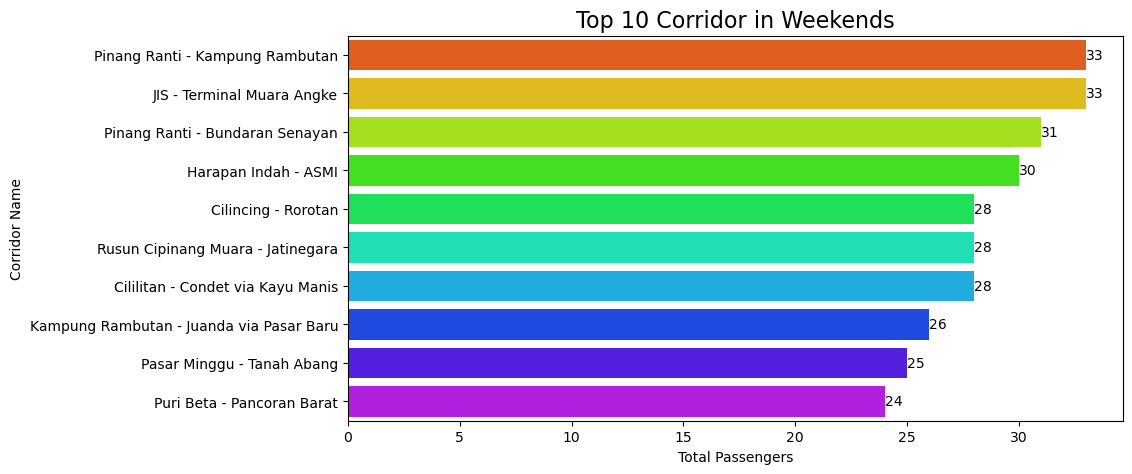

In [285]:
# Top 10 Corridor/Route in Evening Rush
top_weekend_corridor = weekends[['corridorID','corridorName']].value_counts().reset_index().head(10)
display(top_weekend_corridor)

plt.figure(figsize=(10,5))
sns.barplot(x=top_weekend_corridor['count'], y=top_weekend_corridor['corridorName'], palette='gist_rainbow')
plt.title('Top 10 Corridor in Weekends', size=16)
plt.xlabel('Total Passengers')
plt.ylabel('Corridor Name')

for i, count in enumerate(top_weekend_corridor['count']):
    plt.text(count, i, str(count), ha='left', va='center')
    
plt.show()

**Summary of Top 10 Corridor in Weekends:**
- Some corridors, such as Pinang Ranti - Kampung Rambutan (JAK.19) and JIS - Terminal Muara Angke (JAK.120), have relatively higher counts compared to others, indicating potentially higher demand or popularity during weekends.
- Corridors with higher counts may be serving areas with more recreational, leisure, or commercial activities during weekends, leading to increased transportation demand.
- Conversely, corridors with lower counts may be less frequented during weekends, possibly due to fewer weekend activities or alternative transportation options available.

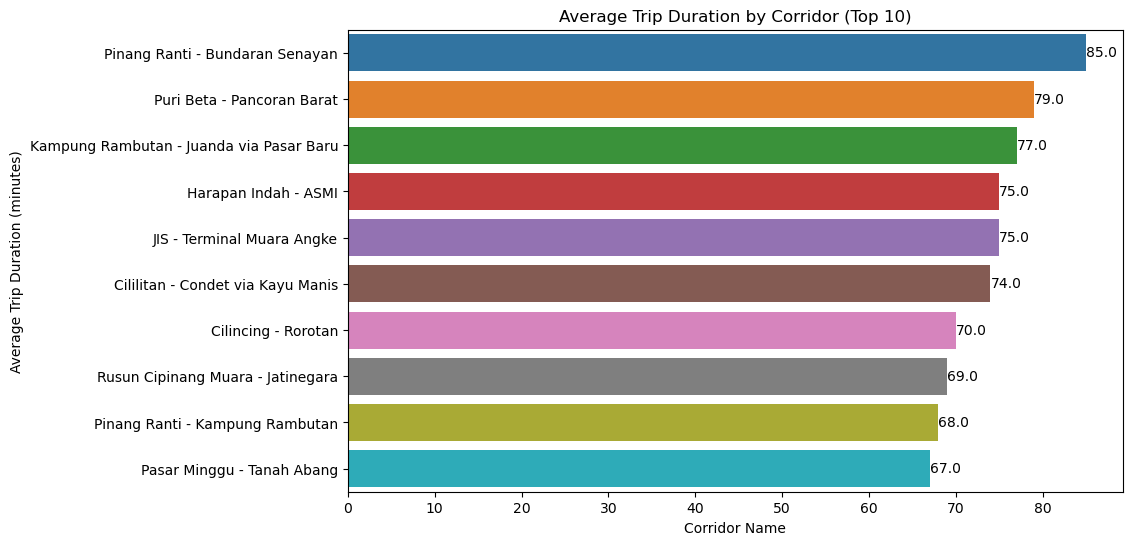

In [220]:
# Average Trip Duration by Corridor (Top 10) in Weekends
top10_route_wn = weekends[weekends['corridorID'].isin(['JAK.19', 'JAK.120', '9C', '2B', 'JAK.58', '11N', 'JAK.37', '7F', '9D','13B'])]
corridor_trip_durations_wn = (top10_route_wn.groupby('corridorName')['tripDuration'].mean().round()).reset_index().sort_values('tripDuration', ascending=False)
# display(corridor_trip_durations_wn)

# Plotting average trip durations for different corridors
plt.figure(figsize=(10, 6))
sns.barplot(x=corridor_trip_durations_wn['tripDuration'],
            y=corridor_trip_durations_wn['corridorName'])
plt.title('Average Trip Duration by Corridor (Top 10)')
plt.xlabel('Corridor Name')
plt.ylabel('Average Trip Duration (minutes)')

for i, count in enumerate(corridor_trip_durations_wn['tripDuration']):
    plt.text(count, i, str(count), ha='left', va='center')

plt.show()

## **CONCLUSION**

1. **Demographic**:
    - Pengguna jasa dan layanan transjakarta didominasi oleh kelompok Millenials, diikuti kelompok Generation Z, Generation X, serta Baby Boomer. Kelompok Millenials dan Generation Z sebagai penumpang terbanyak menunjukkan penggunaan transjakarta sebagai moda transportasi andalan untuk mereka dalam kegiatan produktif seperti menuju tempat kerja, sekolah, dan aktivitas lainnya.
    - Gender pengguna transjakarta kebanyakan berasal dari kelompok perempuan dengan proporsi sebanyak 53.3% dan kelompok laki-laki sebanyak 46.7%.
    - Penggunaan kartu pembayaran terbanyak adalah kartu bank DKI, mengingat PT. Transjakarta bekerja sama langsung dengan Bank DKI. Selain itu, kartu uang elektroniknya juga digunakan dalam pembayaran perjalanan transjakarta, diantaranya adalah e-money, brizzi, flazz, online, dan bni.
    - PT. Transjakarta menyediakan tiga jenis moda transportasi yang utama, diantaranya adalah Reguler TransJakarta, RoyalTrans, dan JakLingko. Pengguna terbanyak berasal dari Regular TransJakarta sebanyak 50.4%, JakLingko 45.0% dan RoyalTrans sebanyak 4.6%

2. **Weekdays**:
    -  Overall tap-in and tap-out are highest during morning and evening commuting hours, these are the busiest times for public transportation usage. Also, indicating less demand for public transportation during midday and early afternoon hours in weekdays. During morning rush, commuters travel from their homes to their workplace, schools, or  other destinations, leading to heavy traffic on roads and increased demand for public transportation.
    - From the tap-in and tap-out stops during the morning rush, it is known that the locations of the stops vary but are dominated by areas in **East Jakarta and South Jakarta**, including: 
        1) Garuda Taman Mini stop, 
        2) Penggilingan, 
        3) Cawang Otista, 
        4) PGC 2, 
        5) Walikota Jakarta Timur, 
        6) BKN Kejaksaan Agung, 
        7) Pancoran Tugu Arah Barat, 
        8) Tendean, 
        9) Bundaran Senayan 1,
        10) Adam Malik.
    - From the tap-in and tap-out stops during the evening rush, it is known that the locations of the stops vary but are dominated by areas in **East Jakarta**: 
        1) Tipar Cakung,
        2) BNN LRT,
        3) Cibubur Junction,
        4) BKN,
        5) Tanah Merdeka Arah Timur,
        6) Pinang Ranti
        7) Term. Kampung 
    - Corridors such as Cibubur - Balai Kota (1T), Ciputat - CSW (S21), and Kampung Rambutan - Pondok Gede (JAK.06) have relatively high counts, suggesting significant demand and utilization during weekdays.
    - The high counts on certain corridors suggest that they are essential routes for weekday commuters, likely connecting residential areas with employment centers, educational institutions, or commercial districts.
    - The average trip durations for the top 10 corridors, ranging from 67 to 76 minutes, generally fall within the majority travel time range of 30 to 120 minutes.

3. **Weekends**:
    - Tap-In and Tap-Out Hour during weekend shows a fluktuative patterns, with peak tap In hour at 17.00 and peak tap-out hour at 19.00. Indicating, most user use transjakarta services during the end of the day to go back.
    - Commuting activity are lower during weekends, indicating most user rarely use TransJakarta services during weekends for doing leisure activity.
    - From the tap-in and tap-out stops during weekends, it is known that the locations of the stops vary but are dominated by areas in **South Jakarta**, such as: 
    1) Gelora Bung Karno,
    2) Kejaksaan Agung,
    3) Jati Padang,
    4) Halimun,
    5) Tendean,
    6) Bundaran Senayan
    - Some corridors, such as Pinang Ranti - Kampung Rambutan (JAK.19) and JIS - Terminal Muara Angke (JAK.120), have relatively higher counts compared to others, indicating potentially higher demand or popularity during weekends. Corridors with higher counts may be serving areas with more recreational, leisure, or commercial activities during weekends, leading to increased transportation demand.



## **RECOMMENDATION**

1. **Demographic Insights**:
   - Target marketing efforts towards Millennials and Generation Z, as they constitute the majority of TransJakarta users. Utilize social media platforms and digital advertising to reach these demographics effectively.
   - Continue promoting the convenience and benefits of using TransJakarta to female commuters, who make up the majority of users.
   - Further promote the use of DKI Bank cards and electronic payment methods like e-money, brizzi, and flazz, by offering incentives such as discounts or rewards for frequent users.
   - Ensure that all three main modes of transportation (Regular TransJakarta, RoyalTrans, and JakLingko) are adequately serviced and maintained to cater to the diverse needs of commuters.

2. **Weekday Travel Patterns**:
   - Enhance service frequency and capacity during peak morning and evening commuting hours to meet the high demand. Consider adding more buses or adjusting schedules to reduce overcrowding and improve passenger comfort.
   - Improve infrastructure and amenities at high-traffic tap-in and tap-out stops to facilitate smoother boarding and alighting processes.
   - Implement measures to alleviate traffic congestion in areas with heavy commuter traffic, such as optimizing traffic signal timings or introducing dedicated bus lanes.

3. **Weekend Usage**:
   - Adjust service schedules and frequencies during weekends to match the fluctuating patterns of tap-in and tap-out hours, ensuring that TransJakarta services remain accessible during peak periods.
   - Explore partnerships with local businesses or event organizers to promote the use of TransJakarta for leisure activities and weekend events, offering special packages or discounts for attendees.
   - Conduct targeted marketing campaigns to raise awareness of weekend destinations accessible via TransJakarta, highlighting the convenience and affordability of public transportation for leisure and recreational purposes.

By implementing these recommendations, TransJakarta can enhance the overall user experience, attract more passengers, and further establish itself as a reliable and preferred mode of transportation in Jakarta.